# Clustering

## K-means clustering

### data set : https://www.kaggle.com/roshansharma/mall-customers-clustering-analysis/data

In [62]:
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

In [16]:
df = pd.read_csv('/content/Mall_Customers.csv')
df.shape
df['Gender'] = df['Gender'].apply(lambda x : 1 if x == 'Female' else 0)
x_train,x_test = tts(df)
x_train

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
159,160,1,30,78,73
20,21,0,35,24,35
26,27,1,45,28,32
180,181,1,37,97,32
182,183,0,46,98,15
...,...,...,...,...,...
32,33,0,53,33,4
9,10,1,30,19,72
96,97,1,47,60,47
171,172,0,28,87,75


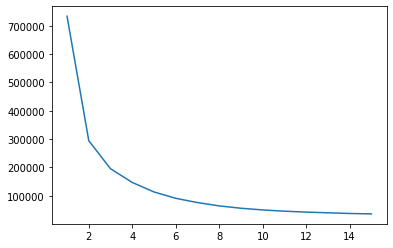

In [57]:
sum_squared_distance = []
for k in range(1,16):
  kmeans_clusters = KMeans(n_clusters = k, init = 'k-means++', n_init = 10, max_iter = 300, random_state = 11)
  kmeans_clusters.fit(x_train) 
  sum_squared_distance.append(kmeans_clusters.inertia_)

plt.plot(range(1,16),sum_squared_distance)


In [58]:
kmeans_clusters = KMeans(n_clusters = 5, init = 'k-means++', n_init = 10, max_iter = 300, random_state = 11)
kmeans_clusters.fit(df)
kmeans_clusters.labels_


array([1, 1, 3, 1, 1, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 3,
       3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 0, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4], dtype=int32)

In [44]:
predicted_clusters = kmeans_clusters.predict(x_test)

In [59]:
silhouette_score(df, kmeans_clusters.labels_,metric='euclidean', random_state=11)

0.4129419301414886

## Hierarchical clustering

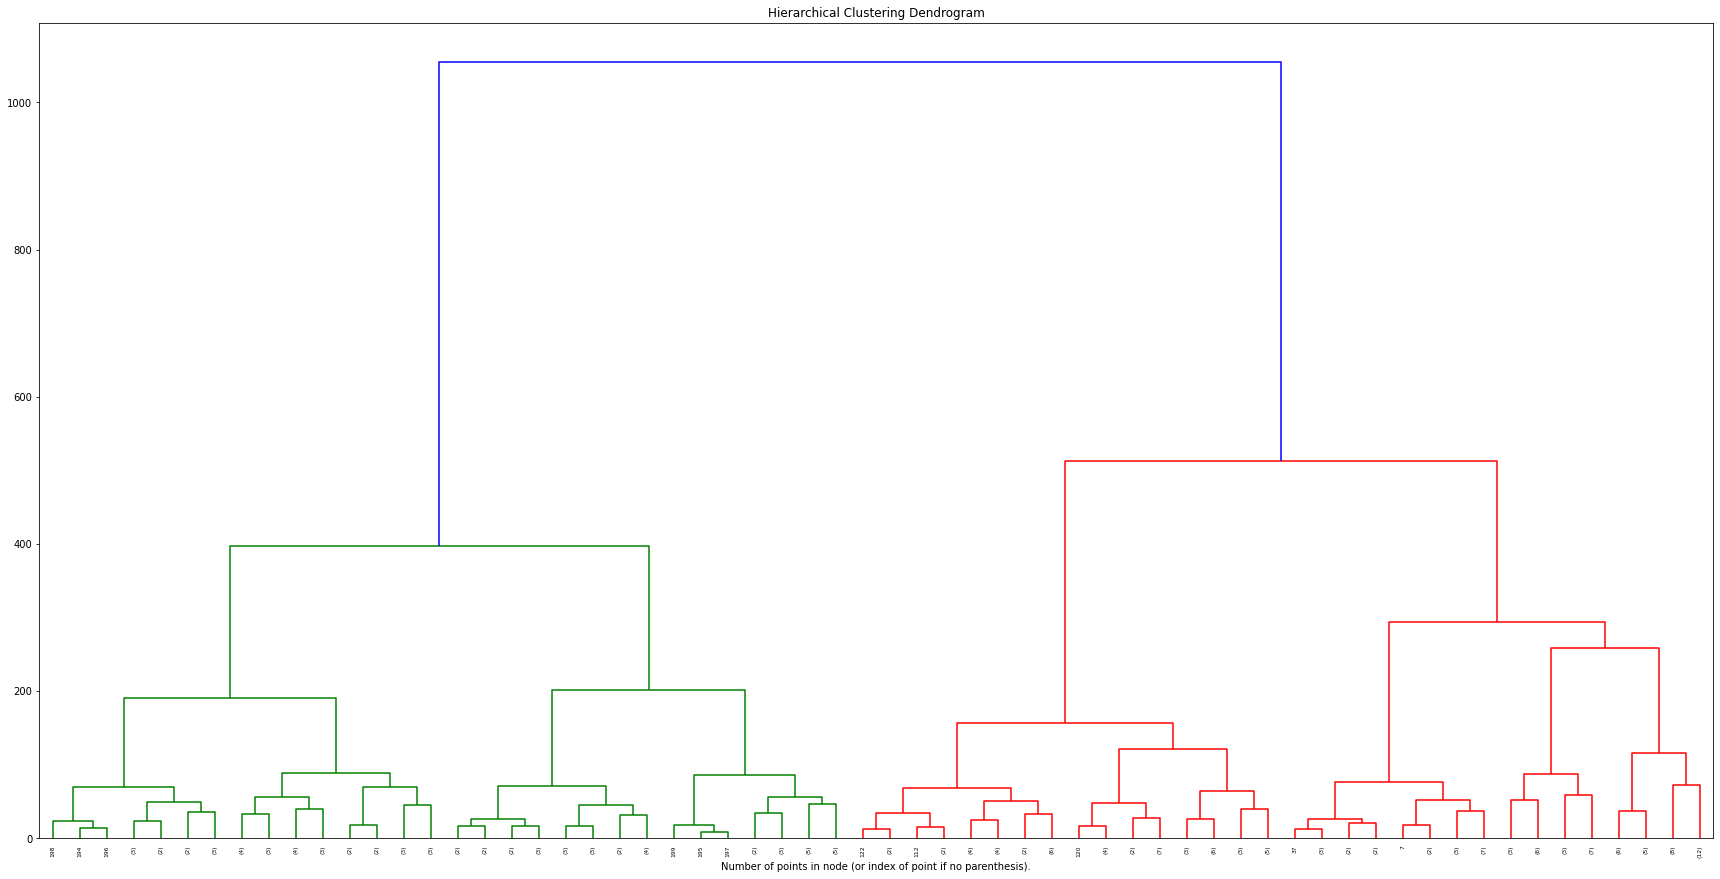

In [69]:




def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(df)
plt.figure(figsize=(30,15))
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=5)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()
